### Exploratory Data Analysis for the Dataset

In [4]:
# Importing Libraries
import json
import matplotlib.pyplot as plt
from collections import Counter

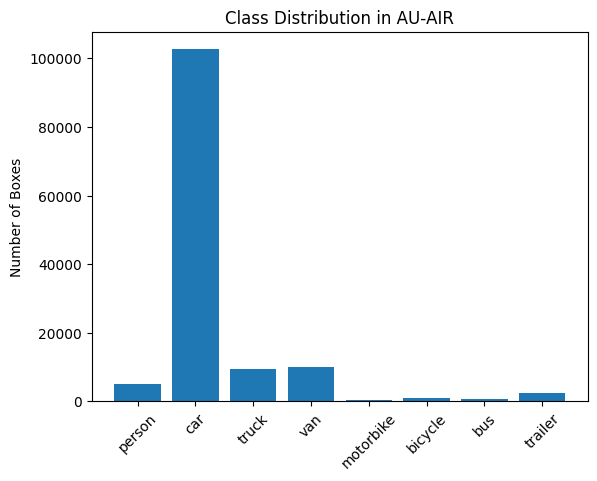

In [2]:
# load COCO JSON
with open("D:/data/AU-AIR/auair_coco.json") as f:
    coco = json.load(f)

# count per class
labels = [ann["category_id"]-1 for ann in coco["annotations"]]
counts = Counter(labels)
classes = coco["categories"]
class_names = [c["name"] for c in classes]
freqs = [counts[i] for i in range(len(classes))]

#Plot findings
plt.bar(class_names, freqs)
plt.xticks(rotation=45)
plt.ylabel("Number of Boxes")
plt.title("Class Distribution in AU‑AIR")
plt.show()

From the plot, it can be said that there is class imbalance in the dataset. The car class dominates all the other classes. 

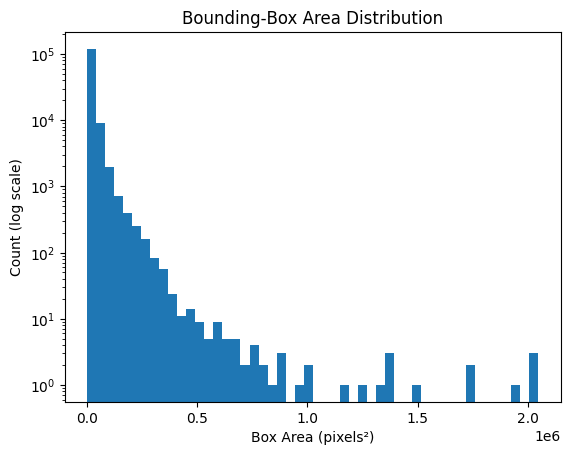

In [3]:
areas = [ann["area"] for ann in coco["annotations"]]
plt.hist(areas, bins=50, log=True)
plt.xlabel("Box Area (pixels²)")
plt.ylabel("Count (log scale)")
plt.title("Bounding‑Box Area Distribution")
plt.show()

As can be seen from the plot, the dataset is dominated by tiny bounding boxes, so the preprocessing and model architecture should detect small‑objects better. On the left (near 0 px²) we can see that the majority of the distribution—tens of thousands of boxes under 0.1 million px² while on the right there are only a few. This can be typical for bird’s‑eye imagery—cars, people and bikes look very small at altitude.